In [1]:
import numpy as np
import sys
sys.path.append('../..')

import utils.plotting as plotting
from utils.data import mono_beta, mono_beta_dfe, sin_beta, sin_beta_dfe, RK4DataGenerator, first_below_threshold

2026-02-11 12:38:02.934222: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-11 12:38:02.947860: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-11 12:38:04.621170: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-11 12:38:07.989087: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
t_0, t_f = 0, 50
beta_nop = 100
beta_t = np.linspace(t_0, t_f, beta_nop)

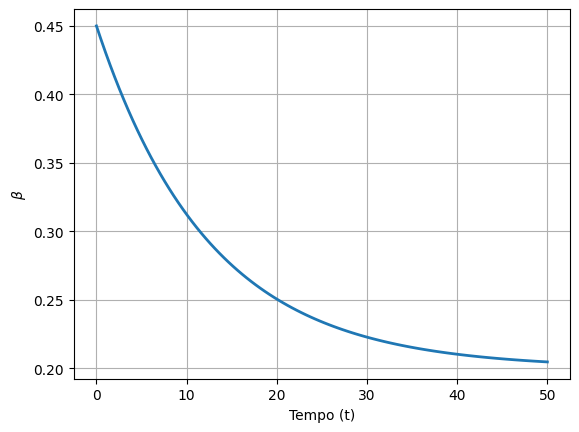

In [3]:
pred_mono_beta = mono_beta(beta_t)
plotting.plot_beta_example(pred_mono_beta, beta_t, "beta-mono-example")

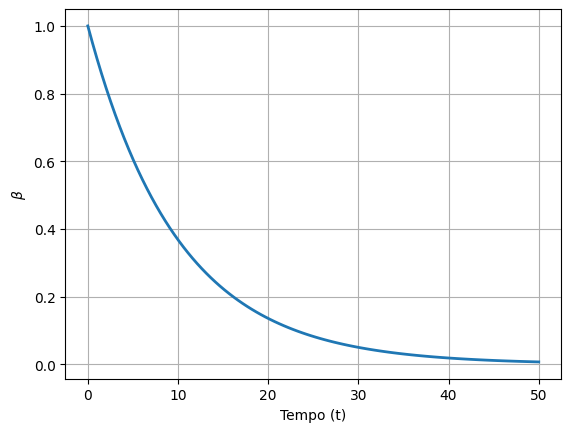

In [4]:
pred_mono_beta_dfe = mono_beta_dfe(beta_t)
plotting.plot_beta_example(pred_mono_beta_dfe, beta_t, "beta-mono-dfe-example")

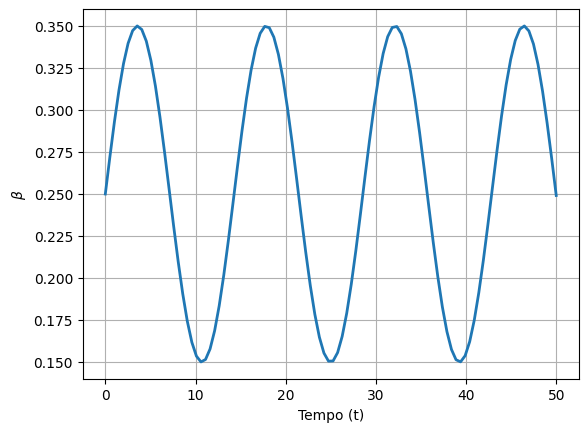

In [5]:
pred_sin_beta = sin_beta(beta_t)
plotting.plot_beta_example(pred_sin_beta, beta_t)

In [6]:
data_nop = 50
data_t = np.linspace(t_0, t_f, data_nop)

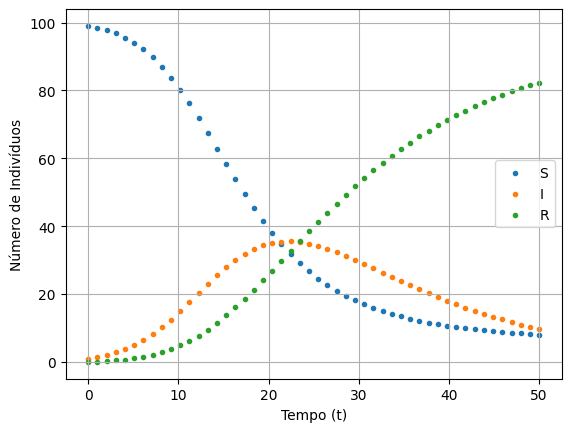

In [7]:
data_gen = RK4DataGenerator(mono_beta, gamma=0.08)
data_mono_beta = data_gen.generate(data_t)
plotting.plot_rk_data(data_t, data_mono_beta, figname="rk-data-mono-beta")

In [8]:
data_gen = RK4DataGenerator(mono_beta, gamma=0.34)
data_mono_beta_dfe = data_gen.generate(data_t)

In [9]:
data_mono_beta_dfe[:,1]

array([1.        , 1.10140939, 1.18787676, 1.25650191, 1.30550237,
       1.33412114, 1.34249176, 1.33241293, 1.3059765 , 1.26538211,
       1.21293719, 1.15105695, 1.08226443, 1.00919026, 0.93425297,
       0.85904474, 0.78486743, 0.7128258 , 0.6438275 , 0.57858312,
       0.51760612, 0.46121289, 0.40952272, 0.36244377, 0.31972222,
       0.28119753, 0.24668102, 0.21593747, 0.18868519, 0.16459599,
       0.14329518, 0.12444284, 0.10787169, 0.09337731, 0.08075125,
       0.06978261, 0.06025803, 0.05196179, 0.04472664, 0.03845484,
       0.03304261, 0.02838768, 0.02438935, 0.02094847, 0.01796882,
       0.01539476, 0.01318323, 0.01128678, 0.00966139, 0.00826637])

In [10]:
dfe_value, dfe_point = first_below_threshold(data_mono_beta_dfe[:,1], threshold=1)
dfe_value, dfe_point

(np.float64(0.9342529659982295), np.int64(14))

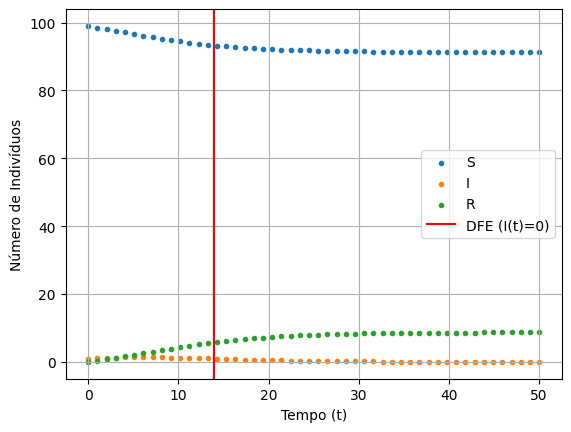

In [11]:
plotting.plot_rk_data(
    data_t, 
    data_mono_beta_dfe, 
    vlines=[[dfe_point, "DFE (I(t)=0)", "red"]],
    figname="rk-data-mono-beta-dfe")


In [1]:
import sys
sys.path.append('../..')

import utils.plotting as plotting
from utils.data import mono_beta, sin_beta, RK4DataGenerator
from utils.data import estimate_beta0, estimate_beta0_isaac, estimate_beta0_isaac2, estimate_beta0_isaac3
import numpy as np

t_0, t_f = 0, 50
data_nop = 50
gamma = 0.2
N = 1
S0 = 0.99
I0 = 0.01
R0 = 0
data_t = np.linspace(t_0, t_f, data_nop)

2026-01-30 15:27:15.359514: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-30 15:27:15.359837: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-30 15:27:15.399657: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-30 15:27:16.572704: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
data_gen_mono = RK4DataGenerator(mono_beta, N=N, S0=S0, I0=I0, R0=R0, gamma=gamma)
data_mono_beta_dfe = data_gen_mono.generate(data_t, noise_std=0.0)
I_data= data_mono_beta_dfe[:,1]

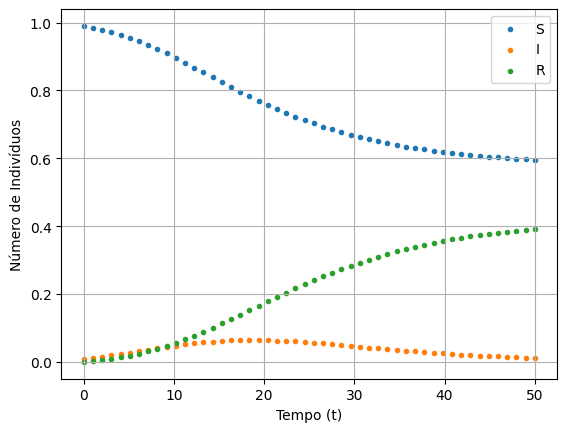

In [3]:
plotting.plot_rk_data(data_t, data_mono_beta_dfe)

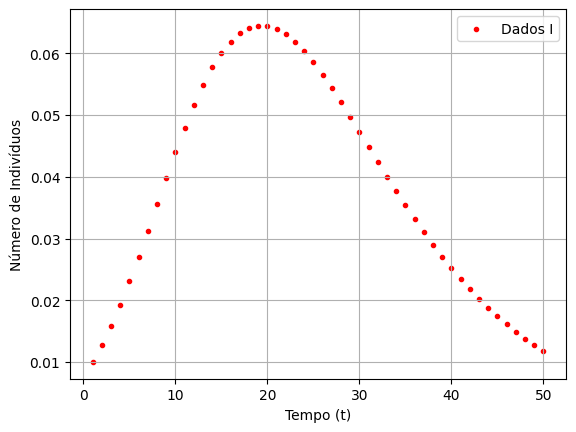

In [4]:
plotting.plot_incidence_data(I_data)

## Monótona

In [28]:
mono_beta(0), estimate_beta0(I_data, gamma=gamma, window=2)

(np.float64(0.45), np.float64(0.2703798399192657))

In [19]:
mono_beta(0), estimate_beta0_isaac(I_data, N, gamma)

(np.float64(0.45), np.float64(0.47523240813770873))

In [3]:
mono_beta(0), estimate_beta0_isaac2(I_data, N, gamma)

(np.float64(0.45), np.float64(0.4554976883678523))

In [6]:
mono_beta(0), estimate_beta0_isaac3(I_data, N, gamma, deltat=4)

(np.float64(0.45), np.float64(0.41276409022872323))

## Seno

In [8]:
data_gen_sin = RK4DataGenerator(sin_beta, N=N, S0=S0, I0=I0, R0=R0, gamma=gamma)
data_sin_beta_dfe = data_gen_sin.generate(data_t, noise_std=0.0)
I_data= data_sin_beta_dfe[:,1]

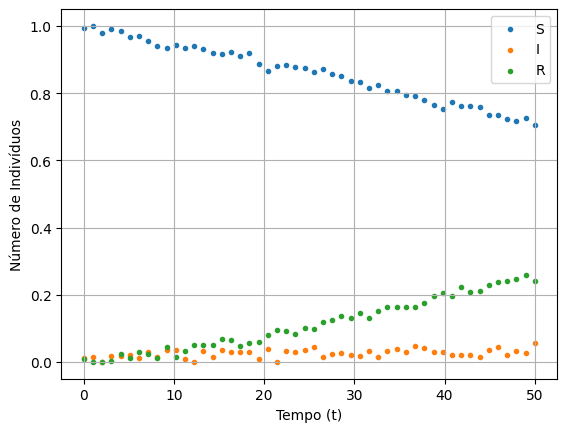

In [22]:
plotting.plot_rk_data(data_t, data_sin_beta_dfe)

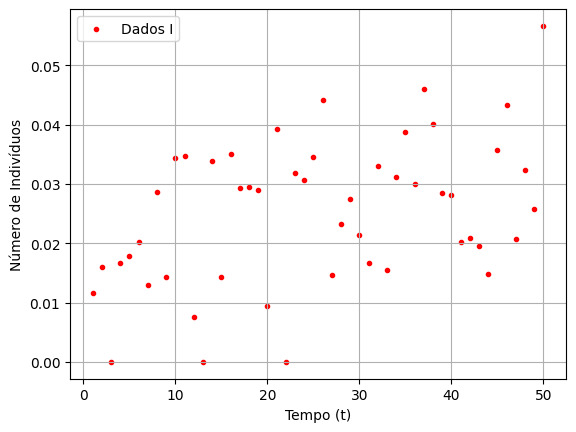

In [23]:
plotting.plot_incidence_data(I_data)

In [11]:
sin_beta(0), estimate_beta0(I_data, gamma=gamma, window=15)

(np.float64(0.25), np.float64(0.2416512933122067))

In [12]:
sin_beta(0), estimate_beta0_isaac(I_data, N=N, gamma=gamma)

(np.float64(0.25), np.float64(0.2756723636917735))

In [13]:
sin_beta(0), estimate_beta0_isaac2(I_data, N=N, gamma=gamma)

(np.float64(0.25), np.float64(0.2489315657565937))

In [11]:
sin_beta(0), estimate_beta0_isaac3(I_data, N=N, gamma=gamma, deltat=1)

(np.float64(0.25), np.float64(0.2731109494133988))

In [10]:
t_0, t_f, N = 0, 50, 100
nop_data = 50
S0, I0, R0 = 99, 1, 0
noise_std = N * 0.00
test_t = np.linspace(t_0, t_f, nop_data)
rkdata = RK4DataGenerator(lambda _: 0.7,
    gamma=0.2,
    t_0=t_0, 
    t_f=t_f, 
    N=N, 
    S0=S0, I0=I0, R0=R0
)
sir_real = rkdata.generate(test_t)

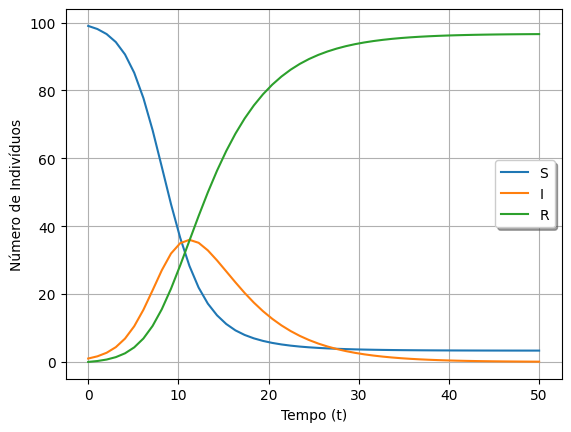

In [12]:
plotting.plot_rk_curves(test_t, sir_real, figname="sir-example-beta0.7-gamma0.2")